# Classification of magnetic phases using a convolutional neural network

### Machine learning phases of matter

Analysis based on a data set used in the paper *Machine learning phases of matter*, by Juan Carrasquilla & Roger G. Melko, published in *Nature Physics* in 2017: https://www.nature.com/articles/nphys4035

Nature Physics, **13**, 431–434 (2017)

### Data and task description

We consider a 2-dimensional square lattice of $n×n$ magnetic dipole moments (spins) that can be in one of two states (+1 or −1, Ising model). We assume that interactions between spins are of short ranged, i.e. each spin interacts only with its four neighbors. The probability to find a spin in one of the orientations is a function of temperature $T$ according to $ p∼ e^{−a/T} $, where $a=const$.

At very low temperatures $T→0$, neighboring spins have a very low probability of different orientations, so that a uniform overall state (ferromagnetic state) is adopted, characterized by +1 or −1. At very high temperatures $T \rightarrow \infty $, a paramagnetic phase with random spin alignment results, yielding 50% of +1 and 50% of −1 orientations. Below a critical temperature $0<T<T_c$, stable ferromagnetic domains emerge, with both orientations being equally probable in the absence of an external magnetic field. The spin-spin correlations diverge at $T_c$, whereas the correlation decays for $T>T_c$.

The data set for this task contains the $n×n$ dipole orientations on the lattice for different temperatures $T$. The task is to use a convolutional neural network for classifying the two magnetic phases.

### Import data

In [17]:
from tensorflow import keras
import numpy as np
callbacks = keras.callbacks
layers = keras.layers

print("keras", keras.__version__)

keras 2.4.0


In [19]:
path = r"C:\Users\Kepesidis\Desktop\Deep Learning for Physicists\tutorials\Tutorial 5\ising_data.npz"
f = np.load(path, allow_pickle=True)
n_train = 20000

x_train, x_test = f["C"][:n_train], f["C"][n_train:]
T_train, T_test = f["T"][:n_train], f["T"][n_train:]

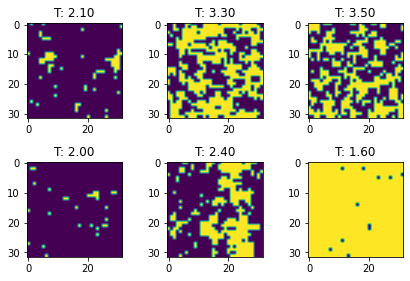

In [22]:
import matplotlib.pyplot as plt

for i,j in enumerate(np.random.choice(n_train, 6)):
    plt.subplot(2,3,i+1)
    image = x_train[j]
    plot = plt.imshow(image)
    plt.title("T: %.2f" % T_train[j])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'frequency')

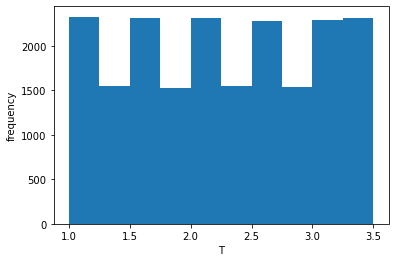

In [23]:
plt.hist(T_train)
plt.xlabel("T")
plt.ylabel("frequency")

#### Definition of magnetic phases in the training set

In [24]:
Tc = 2.27
y_train, y_test = T_train > Tc, T_test > Tc

### Tasks

- Construct a convolutional neural network (with Keras) for the classification of magnetic phases
- Evaluate the network's performance on the test set, by plotting the test accuracy as function of temperature
- Compare to the results obtained using a fully-connected network (Notebook 7)

### 1. Design the network

In [26]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32)))
model.add(layers.Reshape((32, 32, 1)))
model.add(layers.Convolution2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.Convolution2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation='relu'))

model.add(layers.GlobalAveragePooling2D())

#model.add(layers.Dropout(0.25))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)               

In [8]:
3*3*16 + 16

160

In [9]:
((3*3*16))*16 + 16

2320

In [10]:
(3*3*16)*32 + 32

4640

In [11]:
(3*3*32)*32 + 32

9248

### 2. Compile the network

In [28]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy'])

### 3. Train the network

In [29]:
results = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=50,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[
                        callbacks.EarlyStopping(patience=5, verbose=1),
                        callbacks.ReduceLROnPlateau(factor=0.67, patience=2, verbose=1)]
                    )

Epoch 1/50
282/282 - 10s - loss: 0.0854 - accuracy: 0.9699 - val_loss: 0.0487 - val_accuracy: 0.9810
Epoch 2/50
282/282 - 10s - loss: 0.0443 - accuracy: 0.9816 - val_loss: 0.0441 - val_accuracy: 0.9850
Epoch 3/50
282/282 - 10s - loss: 0.0434 - accuracy: 0.9811 - val_loss: 0.0466 - val_accuracy: 0.9840
Epoch 4/50

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0006700000318232924.
282/282 - 10s - loss: 0.0437 - accuracy: 0.9807 - val_loss: 0.0460 - val_accuracy: 0.9790
Epoch 5/50
282/282 - 10s - loss: 0.0412 - accuracy: 0.9819 - val_loss: 0.0420 - val_accuracy: 0.9815
Epoch 6/50
282/282 - 10s - loss: 0.0411 - accuracy: 0.9819 - val_loss: 0.0369 - val_accuracy: 0.9830
Epoch 7/50
282/282 - 10s - loss: 0.0415 - accuracy: 0.9804 - val_loss: 0.0422 - val_accuracy: 0.9830
Epoch 8/50

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004489000252215192.
282/282 - 10s - loss: 0.0398 - accuracy: 0.9822 - val_loss: 0.0384 - val_accuracy: 0.9825
Epoch 9/50
282/282 - 10s - los

### 4. Monitor performance

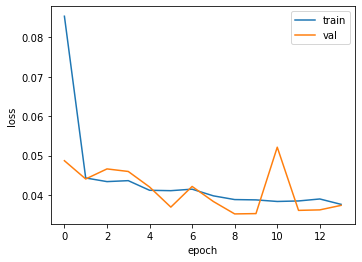

In [30]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

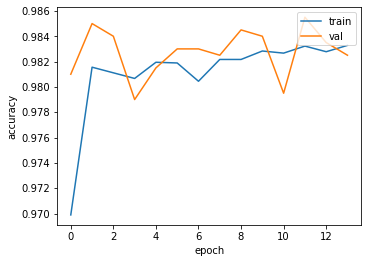

In [31]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

### 5. Model evaluation on the test set

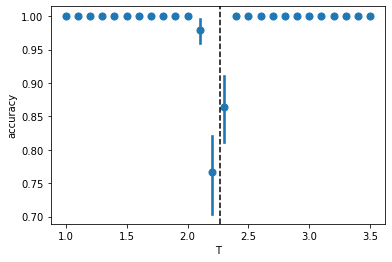

In [32]:
import seaborn as sns

preds = model.predict(x_test).round().squeeze()
acc = (preds == y_test).astype(np.float)

ax = sns.regplot(x=T_test, y=acc, x_estimator= np.mean, fit_reg=False)
ax.set_ylabel("accuracy")
ax.set_xlabel("T")
plt.axvline(x=Tc, color='k', linestyle='--', label='Tc')